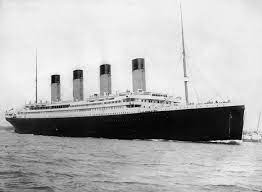

<center><h2 style='font-family:monospace;'>TITANIC SURVIVIAL PREDICTION USING ML</h2></center>
<center>Dataset Link <br><a 'https://www.kaggle.com/competitions/titanic'>TITANIC - MACHINE LEARNING FROM DISASTER</a></center>

<b> The Challenge </b><br>
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


<b> What Data Will I Use in This Competition? </b><br>
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

Check out the “Data” tab to explore the datasets even further. Once you feel you’ve created a competitive model, submit it to Kaggle to see where your model stands on our leaderboard against other Kagglers.

<b>Goal</b><br>

It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

--------STEPS--------------
1. Loading Dataset
2. EDA
3. Feature Engineering
4. Model Building and Training
5. Model Evaluation
6. Hyper parameter Tuning
7. Test Set Cleaning
8. Prediction on Test Set
9. Submitting Result To Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
## Checking for  the number of rows and columns  in the dataset
print(f"Number of rows :{df_train.shape[0]} \nNumber of columns:{df_train.shape[1]}")

Number of rows :891 
Number of columns:12


## EDA

****Survived****

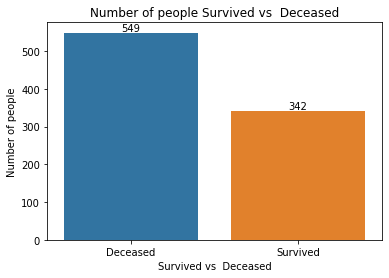

In [5]:
ax = sns.countplot(data=df_train,x = 'Survived');
ax.bar_label(ax.containers[0])
plt.title("Number of people Survived vs  Deceased")
plt.xlabel("Survived vs  Deceased")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Deceased','Survived'])
plt.show();

****Age****

In [6]:
df_train.Age.isna().sum()

177

In [7]:
### Filling NAN Values With Mean
df_train["Age"]= df_train["Age"].fillna(df_train["Age"].mean())
### Plotting People On Different Age Groups
df_train.Age = df_train.Age.astype(int)

In [8]:
#### Creating A Copy of The Dataset
temp = df_train.copy()

In [9]:
temp['Age'] = pd.cut(temp['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

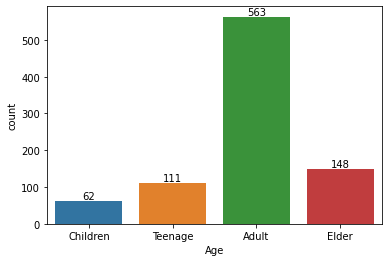

In [10]:
ax = sns.countplot(data=temp,x = 'Age')
ax.bar_label(ax.containers[0]);

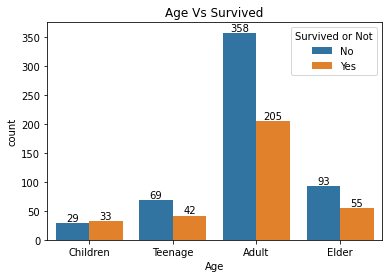

In [11]:
ax = sns.countplot(data=temp,x = 'Age',hue='Survived')
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Age Vs Survived')
plt.show();

****Fair****

In [12]:
temp['Fare'].mean()

32.204207968574636

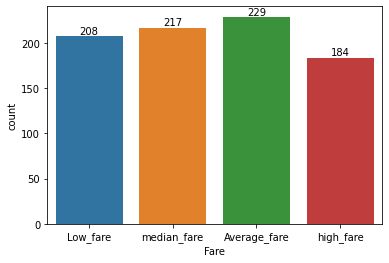

In [13]:
temp['Fare'] = pd.cut(temp['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
ax = sns.countplot(data=temp, x='Fare')
ax.bar_label(ax.containers[0]);

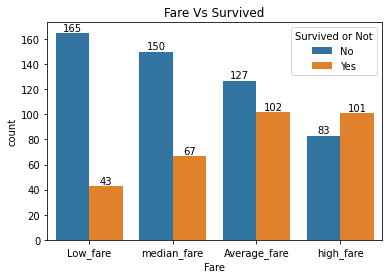

In [14]:
ax = sns.countplot(data=temp, x='Fare',hue='Survived')
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Fare Vs Survived')
plt.show();

****Cabin****

In [15]:
nullCabin = temp.Cabin.isna().sum()
nullCabin

687

In [16]:
str(round(nullCabin/(len(temp))*100,2))+"% Null Values"

'77.1% Null Values'

There Are So Many Null Values So Its Better To Drop It.

****Pclass : Passenger Class****

In [17]:
temp.Pclass.unique()

array([3, 1, 2], dtype=int64)

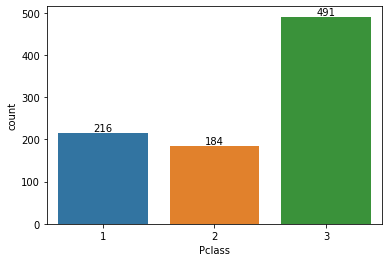

In [18]:
ax = sns.countplot(data=temp,x='Pclass');
ax.bar_label(ax.containers[0]);

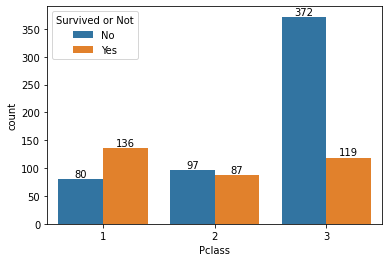

In [19]:
ax = sns.countplot(data=temp,x='Pclass',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper left', labels=['No', 'Yes']);

****Sex****

In [20]:
temp.Sex.unique()

array(['male', 'female'], dtype=object)

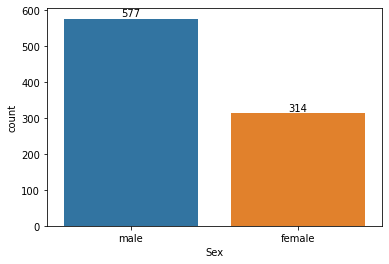

In [21]:
ax = sns.countplot(data=temp,x='Sex');
ax.bar_label(ax.containers[0]);

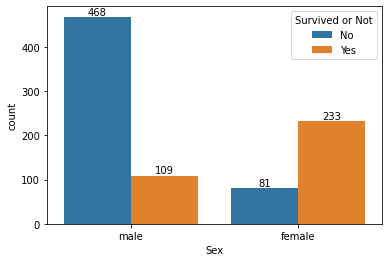

In [22]:
### Sex vs Survived
ax = sns.countplot(data=temp,x='Sex',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);

****SibSp  : # of siblings / spouses aboard the Titanic****

In [23]:
temp.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

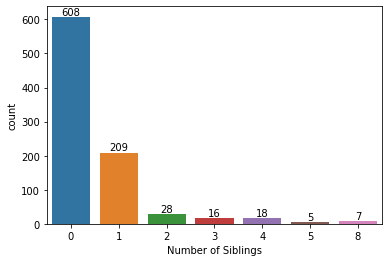

In [24]:
ax = sns.countplot(data=temp,x='SibSp');
ax.bar_label(ax.containers[0]);
ax.set_xlabel('Number of Siblings');

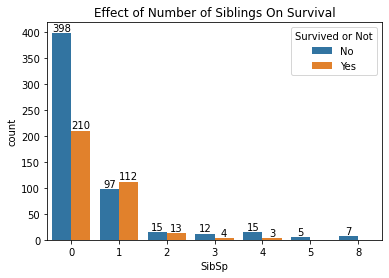

In [25]:
### Number of Siblings vs Survived
ax = sns.countplot(data=temp,x='SibSp',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Effect of Number of Siblings On Survival')
plt.show();

****temp.Parch : # of parents / children aboard the Titanic****

In [26]:
temp.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

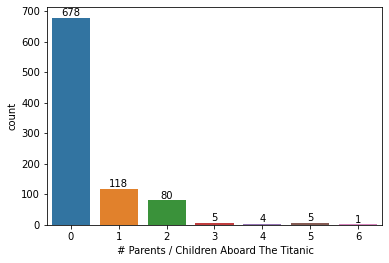

In [27]:
ax = sns.countplot(data=temp,x='Parch');
ax.bar_label(ax.containers[0]);
ax.set_xlabel(' # Parents / Children Aboard The Titanic');

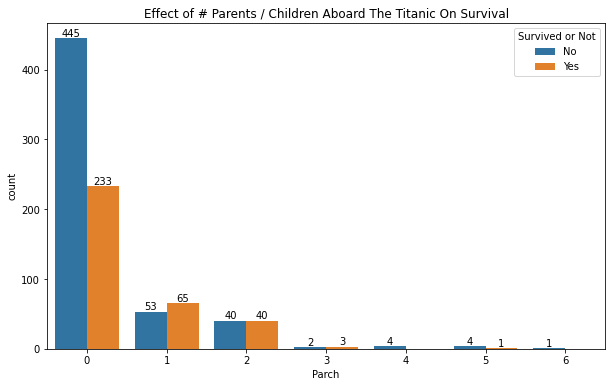

In [28]:
### Parch vs Survived
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Parch',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Effect of # Parents / Children Aboard The Titanic On Survival')
plt.show();

In [29]:
temp['Family Size'] = temp['SibSp']+temp['Parch'] + 1

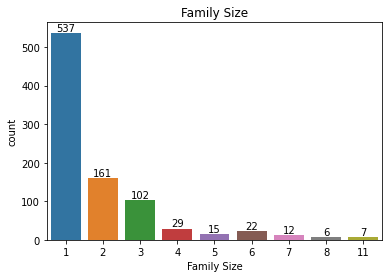

In [30]:
ax = sns.countplot(data=temp, x='Family Size')
ax.bar_label(ax.containers[0])
ax.set_title('Family Size');

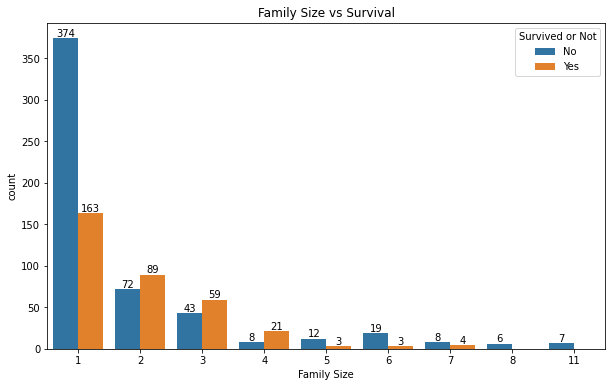

In [31]:
### Parch vs Survived
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Family Size',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Family Size vs Survival')
plt.show();

****Embarked****

In [32]:
temp.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

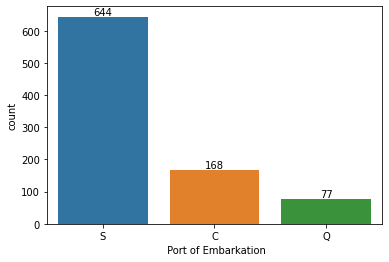

In [33]:
ax = sns.countplot(data=temp,x='Embarked');
ax.bar_label(ax.containers[0]);
ax.set_xlabel(' Port of Embarkation');

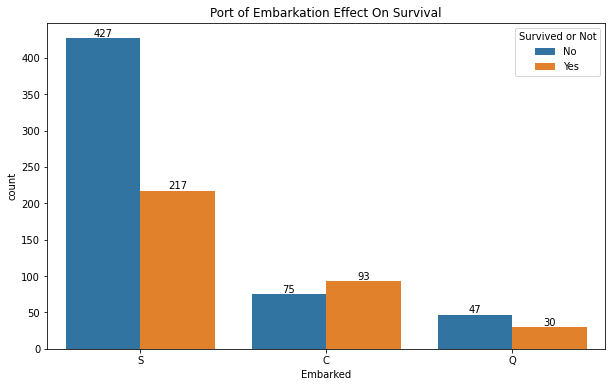

In [34]:
### Port of Embarkation vs Survived
plt.figure(figsize=(10,6))
ax = sns.countplot(data=temp,x='Embarked',hue='Survived');
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.legend(title='Survived or Not', loc='upper right', labels=['No', 'Yes']);
plt.title('Port of Embarkation Effect On Survival')
plt.show();

### EDA Analysis Results

* Family Size Under 5 Had Higher Chance of Survival On Titanic Disaster.
* People Traveling Alone had approx 43% Chances of Survival.
* Family with Size 5+ Had Lesser Chance of Complete Survival On Titanic Disaster. 

## Feature Engineering

In [35]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [36]:
def clean_data(data):
    #### Let's Start By Dropping `PassengerID` `Name` `Ticket` `Cabin` 
    data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
    
    #### Converting Age Into Four Different Classes 'Children', 'Teenage','Adult', 'old'
    data['Age'] = pd.cut(data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    
    #### Converting Fare Into Four Distinct Categories 'Low_fare','median_fare','Average_fare','high_fare'
    data['Fare'] = pd.cut(data['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
    
    #### Getting OneHotEncoding For Categorical Columns ['Age','Fare','Sex','Embarked']
    data = pd.get_dummies(data, columns = ["Sex","Age","Embarked","Fare"])
    
    return data

In [38]:
df_train = clean_data(df_train)

In [41]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [43]:
X.head()

,Pclass,SibSp,Parch,Sex_female,Sex_male,Age_Children,Age_Teenage,Age_Adult,Age_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_Low_fare,Fare_median_fare,Fare_Average_fare,Fare_high_fare
0,3,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [44]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

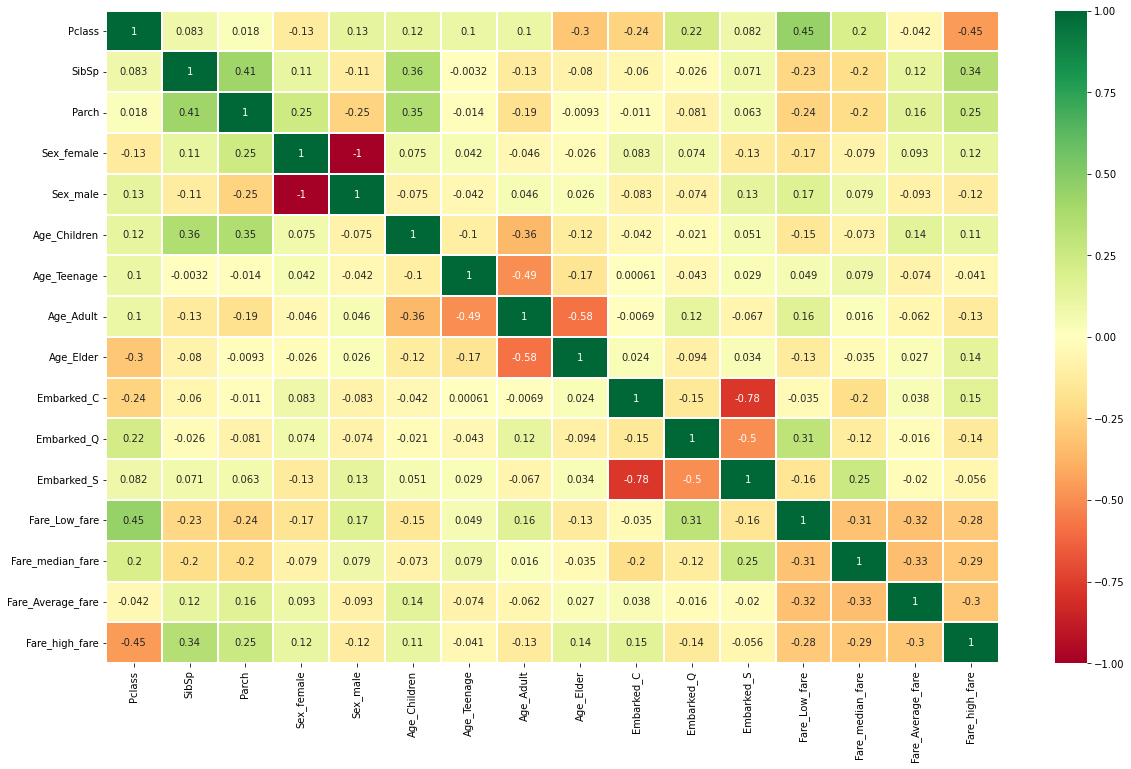

In [47]:
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

`POSITIVE CORRELATION` : if increase in A leads to increase in Feature B Then Those Two Features Are Positive correlated. The Value for a perfectly positive correlated features is `1`.

`NEGATIVE CORRELATION`: if increase in A leads to decrease in Feature B Then Those Two Features Are Negative correlated. Then Value for a perfectly negative correlated feature is `-1`.

Having Two Highly or Perfectly Correlated Feature In Our Training Data Will Cause  MultiColinearity So It is better to remove them. 

In The Above Heatmap we can see that there are no highly correlated feature. the highest value for correlation is `0.41` Between features `Parch` and `SibSp`. So There Are No Need To Remove Any Feature.

We Can Also Do This With Help of Code By Defining A Threshold Value like `0.6`


In [62]:
threshold=0.60
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(X,threshold)

set()

We Got A Empty `set()` means there are no correlated features.

## Model Training

**Models**
1. Naive Bayes
2. SVM
3. KNN
4. Logistic Regression
5. Random Forest
6. Gradient Boost
7. ADA Boost


In [64]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict ## Cross Validation

### Naive Bayes

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 78.36
The cross validated score for Gaussian Naive Bayes classifier is: 77.78


c:\users\abhay\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


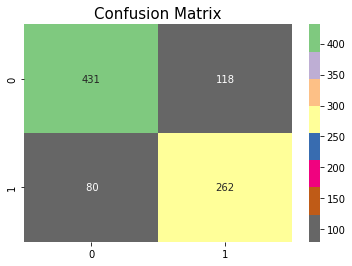

In [87]:
#################################### Naive Bayes ########################
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))

kfold = KFold(n_splits=8, random_state=42) # split the data into 10 equal parts

result_gnb=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### SVM

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 82.09
The cross validated score for Gaussian Naive Bayes classifier is: 82.27


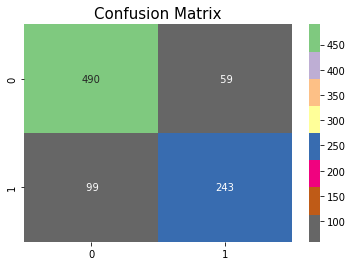

In [102]:
#################################### Naive Bayes ########################
from sklearn.svm import SVC, LinearSVC
model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))

kfold = KFold(n_splits=8, random_state=42) # split the data into 10 equal parts

result_svm=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_svm.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### KNN

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 78.73
The cross validated score for Gaussian Naive Bayes classifier is: 79.58


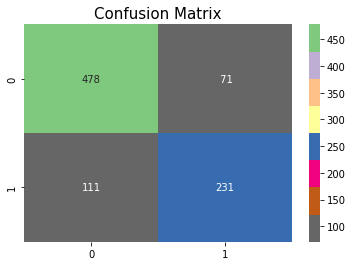

In [103]:
#################################### Naive Bayes ########################
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier()
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))

kfold = KFold(n_splits=8, random_state=42) # split the data into 10 equal parts

result_knn=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_knn.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### Logistic Regression

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 79.85
The cross validated score for Gaussian Naive Bayes classifier is: 79.69


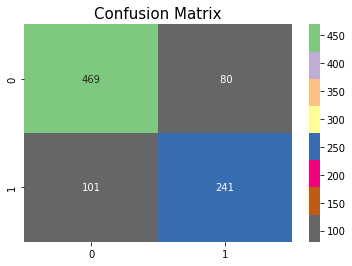

In [104]:
#################################### Naive Bayes ########################
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_lr,y_test)*100,2))

kfold = KFold(n_splits=8, random_state=42) # split the data into 10 equal parts

result_lr=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_lr.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### Random Forest

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 78.73
The cross validated score for Gaussian Naive Bayes classifier is: 82.39


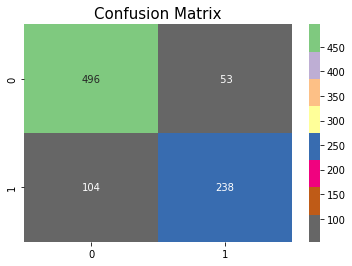

In [111]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=800,
                             min_samples_split=12,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_rf,y_test)*100,2))

kfold = KFold(n_splits=8, random_state=42) # split the data into 10 equal parts

result_rf=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_rf.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### Gradient Boost

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 77.61
The cross validated score for Gaussian Naive Bayes classifier is: 82.05


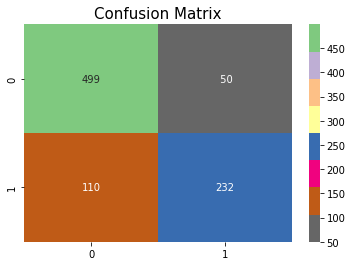

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()

model.fit(X_train,y_train)
prediction_gb=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gb,y_test)*100,2))

kfold = KFold(n_splits=8, random_state=42) # split the data into 10 equal parts

result_gb=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gb.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

### ADA Boost

--------GaussianNB Naive Bayes -------
The accuracy Gaussian Naive Bayes Classifier is 79.1
The cross validated score for Gaussian Naive Bayes classifier is: 79.91


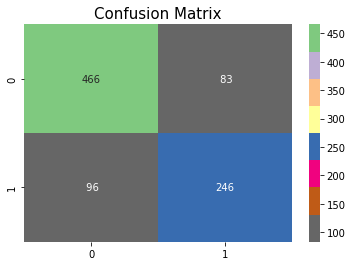

In [107]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()

model.fit(X_train,y_train)
prediction_ada=model.predict(X_test)

print('--------GaussianNB Naive Bayes -------')
print('The accuracy Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_ada,y_test)*100,2))

kfold = KFold(n_splits=8, random_state=42) # split the data into 10 equal parts

result_ada=cross_val_score(model,X,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_ada.mean()*100,2))

y_pred = cross_val_predict(model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="Accent_r")
plt.title('Confusion Matrix', y=1, size=15);

**Model Evaluation**

In [112]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Boosting'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rf.mean(), result_gnb.mean(), result_ada.mean(), 
              result_gb.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.823870
0,Support Vector Machines,0.822684
6,Gradient Boosting,0.820462
4,Naive Bayes,0.814906
5,AdaBoostClassifier,0.799126
2,Logistic Regression,0.796891
1,KNN,0.795805


## Hyper-Parameters Tuning

In [114]:
from sklearn.model_selection import GridSearchCV

n_estim=range(100,1000,100)
max_depth = range(5,15,2)

param_grid = {"n_estimators" :n_estim,"max_depth":max_depth}

model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(X_train,y_train)

print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 225 out of 225 | elapsed:  1.4min finished


0.8266451612903225


RandomForestClassifier(max_depth=11, min_samples_split=12, n_jobs=-1,
                       oob_score=True, random_state=1)

In [121]:
### Applying Param Got From GridSearchCV
rfmodel = RandomForestClassifier(max_depth=11, min_samples_split=12, n_jobs=-1,
                       oob_score=True, random_state=11)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=11, min_samples_split=12, n_jobs=-1,
                       oob_score=True, random_state=11)

## Test Data

In [131]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
test = clean_data(df_test)

In [133]:
y_pred = rfmodel.predict(test)

In [134]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [135]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred})

In [136]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [137]:
submission.to_csv('data/Submission.csv', index=False)